In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

from cut_predictor import ProjectionPredictor

In [2]:
reg = ProjectionPredictor.from_h5('../../models/springback_uv_thickness.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [3]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def visualize(x, y):
    plt.figure()
    plt.imshow(y[0, :, :].T)
    plt.title("Thickness")
    plt.colorbar()
    plt.figure()
    plt.imshow(y[1, :, :].T)
    plt.title("epseqpl")
    plt.colorbar()
    plt.figure()
    plt.imshow(y[2, :, :].T)
    plt.title("Thinning")
    plt.colorbar()
    plt.show()

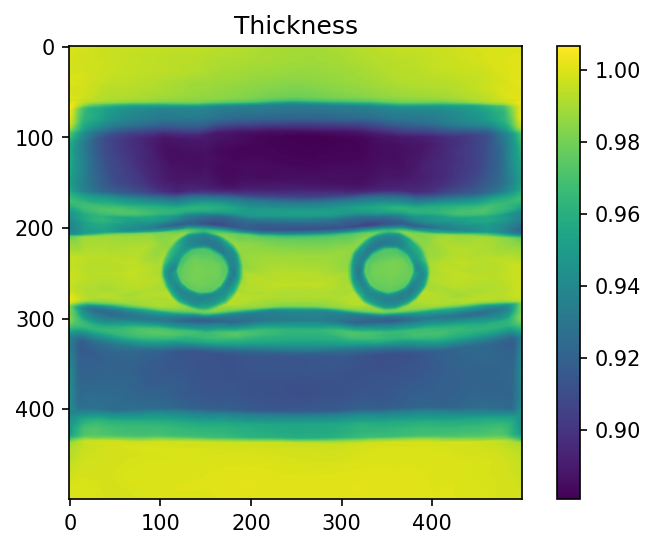

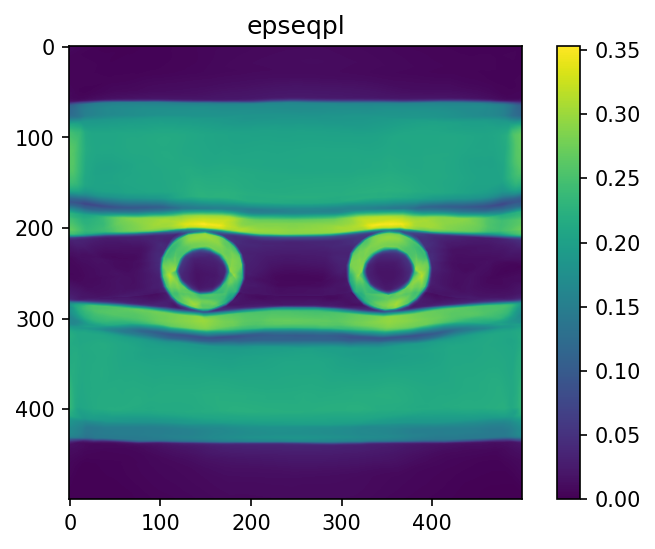

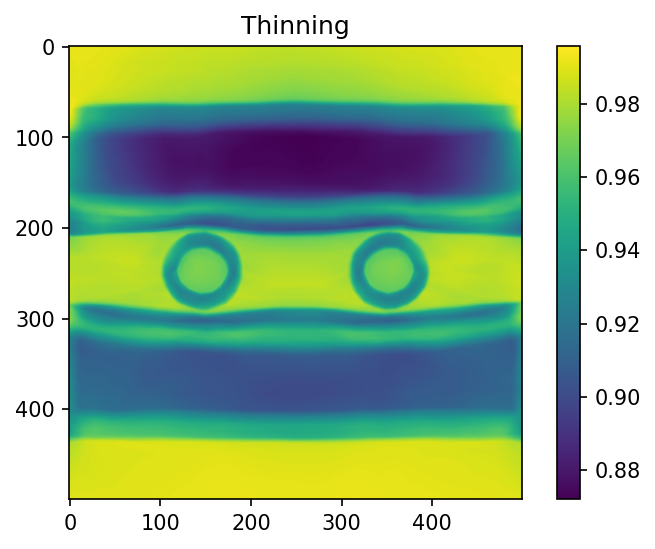

In [4]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 400.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 138.22696,
        'Rp50': 449.528189,
    }, 
    positions=(500, 500))

visualize(x, y)

In [6]:
reg.interactive(visualize, positions=(500, 500))

interactive(children=(FloatSlider(value=1.1883700000000001, description='Blechdicke', max=1.48, min=0.99, step…